In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_json('http://coronavirus-19-api.herokuapp.com/countries')

In [4]:
data.head()

,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,totalTests,testsPerOneMillion
0,World,40599201,302980,1122091,3728,30326916.0,9150194.0,72591,5208,144,0,0
1,USA,8443499,45398,225151,377,5491461.0,2726887.0,15365,25464,679,126935424,382815
2,India,7594284,46046,115235,593,6730379.0,748670.0,8944,5487,83,95083976,68700
3,Brazil,5250727,15383,154176,271,4681659.0,414892.0,8318,24650,724,17900000,84033
4,Russia,1415316,15982,24366,179,1075904.0,315046.0,2300,9697,167,54300208,372038


In [7]:
data.country.unique()

array(['World', 'USA', 'India', 'Brazil', 'Russia', 'Spain', 'Argentina',
       'Colombia', 'France', 'Peru', 'Mexico', 'UK', 'South Africa',
       'Iran', 'Chile', 'Iraq', 'Italy', 'Bangladesh', 'Germany',
       'Indonesia', 'Philippines', 'Turkey', 'Saudi Arabia', 'Pakistan',
       'Israel', 'Ukraine', 'Netherlands', 'Belgium', 'Canada', 'Poland',
       'Romania', 'Czechia', 'Morocco', 'Ecuador', 'Bolivia', 'Nepal',
       'Qatar', 'Panama', 'Dominican Republic', 'Kuwait', 'UAE', 'Oman',
       'Kazakhstan', 'Egypt', 'Sweden', 'Portugal', 'Guatemala',
       'Costa Rica', 'Japan', 'Ethiopia', 'Honduras', 'Belarus',
       'Venezuela', 'Switzerland', 'Bahrain', 'Moldova', 'Austria',
       'Armenia', 'Uzbekistan', 'Lebanon', 'Nigeria', 'Singapore',
       'Paraguay', 'Algeria', 'Kyrgyzstan', 'Ireland', 'Libya', 'Hungary',
       'Palestine', 'Ghana', 'Azerbaijan', 'Kenya', 'Tunisia',
       'Afghanistan', 'Jordan', 'Myanmar', 'Serbia', 'Denmark',
       'Bosnia and Herzegovina', 

In [10]:
#Coronavirus in the world:

mundo = data[data.country == 'World']

In [11]:
mundo

,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,totalTests,testsPerOneMillion
0,World,40599201,302980,1122091,3728,30326916.0,9150194.0,72591,5208,144,0,0


In [13]:
tasa_letalidad = mundo.deaths / mundo.cases
tasa_letalidad

0    0.027638
dtype: float64

In [14]:
poblacion_mundial = 7800124000
tasa_mortalidad = mundo.deaths / poblacion_mundial
tasa_mortalidad

0    0.000144
Name: deaths, dtype: float64

## Hasta el día de la fecha (19/10/2020), el Covid-19 presenta 40.599.201 contagios a nivel mundial, con 1.122.091 fallecidos, lo que arroja una tasa de letalidad de 0.028%. En cuanto a la tasa de mortalidad, se observa un bajo 0.0001%.

In [27]:
porcentaje_recuperados = round(mundo.recovered * 100 / mundo.cases, 2)
porcentaje_recuperados

0    74.7
dtype: float64

In [24]:
porcentaje_criticos = round(mundo.critical * 100 / mundo.todayCases, 2)
porcentaje_criticos

0    23.96
dtype: float64

In [32]:
total_casos = data[1:].groupby('country')['cases'].sum().sort_values(ascending=False).head(10)

In [33]:
total_casos

country
USA          8443499
India        7594284
Brazil       5250727
Russia       1415316
Spain        1015795
Argentina     989680
Colombia      965883
France        910277
Peru          868675
Mexico        851227
Name: cases, dtype: int64

In [1]:
#Gráfico básico con Matplotlib:

paises = ['USA', 'India', 'Brazil', 'Russia', 'Spain', 'Argentina', 'Colombia', 'France', 'Peru', 'Mexico']
colors = 'rgbkymcrgb'
plt.figure(figsize=(12,6))
plt.bar(paises, total_casos, width=0.5, color=colors)
plt.show()

NameError: name 'plt' is not defined

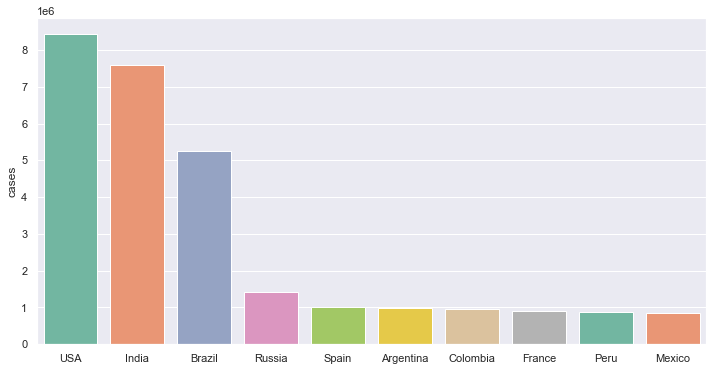

In [52]:
#Gráfico tuneado con Seaborn:

sns.set()
color = sns.color_palette("Set2")
plt.figure(figsize=(12,6))
sns.barplot(paises, total_casos, palette=color)
plt.show()

In [53]:
paises_mas_casos = data[data.cases >= 851227]

In [55]:
paises_mas_casos = paises_mas_casos[1:]
paises_mas_casos

,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,totalTests,testsPerOneMillion
1,USA,8443499,45398,225151,377,5491461.0,2726887.0,15365,25464,679,126935424,382815
2,India,7594284,46046,115235,593,6730379.0,748670.0,8944,5487,83,95083976,68700
3,Brazil,5250727,15383,154176,271,4681659.0,414892.0,8318,24650,724,17900000,84033
4,Russia,1415316,15982,24366,179,1075904.0,315046.0,2300,9697,167,54300208,372038
5,Spain,1015795,12214,33992,73,NaN,NaN,1857,21723,727,15503165,331546
6,Argentina,989680,0,26267,0,803965.0,159448.0,4387,21838,580,2373496,52372
7,Colombia,965883,6311,29102,132,867961.0,68820.0,2115,18922,570,4467051,87513
8,France,910277,13243,33623,146,105935.0,770719.0,2099,13936,515,13765883,210755
9,Peru,868675,0,33759,0,779779.0,55137.0,1068,26238,1020,4230353,127775
10,Mexico,851227,4119,86167,108,619036.0,146024.0,2617,6582,666,2183272,16881


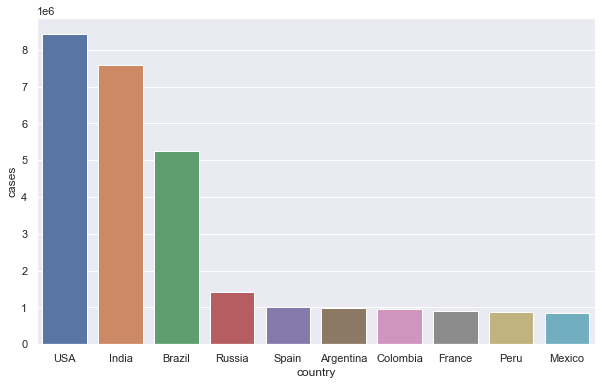

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x="country", y="cases", data=paises_mas_casos)
plt.show()

In [65]:
casos_por_millon = data.groupby('country')['casesPerOneMillion'].sum().sort_values(ascending=False).head(10)

In [63]:
casos_por_millon

country
Andorra          46868
Qatar            46182
Bahrain          45518
Aruba            40542
French Guiana    34120
Vatican City     33666
Israel           33147
Panama           28777
Kuwait           27238
Peru             26238
Name: casesPerOneMillion, dtype: int64

In [66]:
mas_casos_por_millon = data[data.casesPerOneMillion >= 26238]

In [75]:
mas_casos_por_millon.sort_values('casesPerOneMillion', inplace=True)
mas_casos_por_millon.reset_index(drop=True, inplace = True)

<ipython-input-75-8c8ec8494d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mas_casos_por_millon.sort_values('casesPerOneMillion', inplace=True)


In [76]:
mas_casos_por_millon

,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,totalTests,testsPerOneMillion
0,Peru,868675,0,33759,0,779779.0,55137.0,1068,26238,1020,4230353,127775
1,Kuwait,116832,686,710,9,108606.0,7516.0,133,27238,166,834167,194478
2,Panama,124745,0,2564,0,101041.0,21140.0,107,28777,591,582974,134486
3,Israel,304876,1767,2263,54,278394.0,24219.0,634,33147,246,4226477,459520
4,Vatican City,27,0,0,0,15.0,12.0,0,33666,0,0,0
5,French Guiana,10268,25,69,0,9995.0,204.0,5,34120,229,71790,238557
6,Aruba,4334,12,34,0,4040.0,260.0,4,40542,318,36680,343118
7,Bahrain,78224,322,302,2,74683.0,3239.0,35,45518,176,1628076,947364
8,Qatar,129671,240,224,0,126650.0,2797.0,49,46182,80,886186,315615
9,Andorra,3623,246,62,3,2273.0,1288.0,22,46868,802,137457,1778182


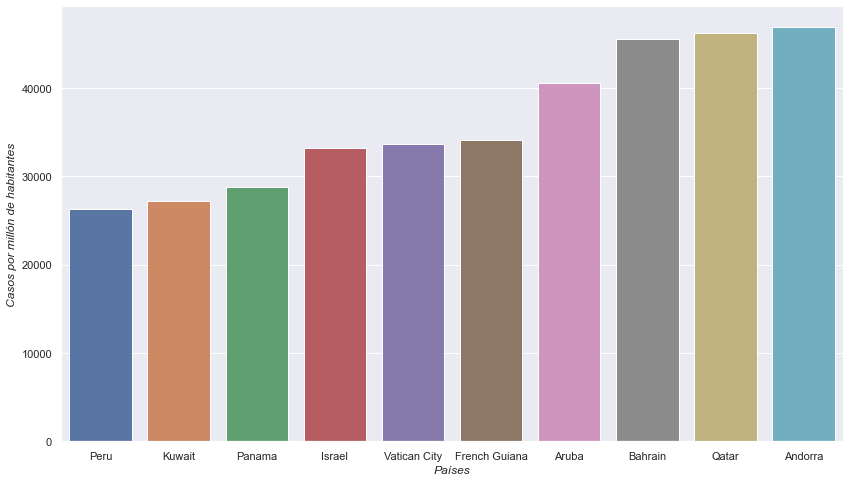

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize=(14,8))
sns.barplot(x="country", y="casesPerOneMillion", data=mas_casos_por_millon)
plt.xlabel('Países', fontstyle='italic')
plt.ylabel('Casos por millón de habitantes', fontstyle='italic')          
plt.show()
plt.tight_layout()